# Exploration des Korpus & Visualisierungen

In [1]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
# großes DF einlesen 

df_bigger = pd.read_csv('Korpus/corpus_complete.csv', sep=',', encoding='utf-8')

In [3]:
df_bigger.head()

,doc,source,author,title,year,period,text type,text,words
0,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0
1,Poesia.IV.1.Testo.txt,MIDIA,Giuseppe Paolucci (Alessi Cillenio),Poesie,1700.0,1700-1750,poesia,IV. 1. Rime degli Arcadi: Alessi Cillenio (Giu...,10862.0
2,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0
3,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0
4,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0


In [4]:
df_bigger.shape

(6270945, 9)

### Anzahl der Texte pro Zeitraum

In [5]:
periods = list(df_bigger['period'].unique())
per_len ={i: len(df_bigger[df_bigger['period']==i]) for i in periods}
per_len

{'1700-1750': 4636,
 '1751-1800': 2843,
 '1801-1825': 1867,
 '1826-1850': 7451,
 '1851-1875': 17953,
 '1876-1900': 31562,
 '1901-1925': 21543,
 '1926-1950': 11393,
 '1951-1975': 1001,
 '1976-2000': 143593,
 '2001-2010': 1299652,
 '2011-2016': 1623321,
 '2017-2021': 3104130}

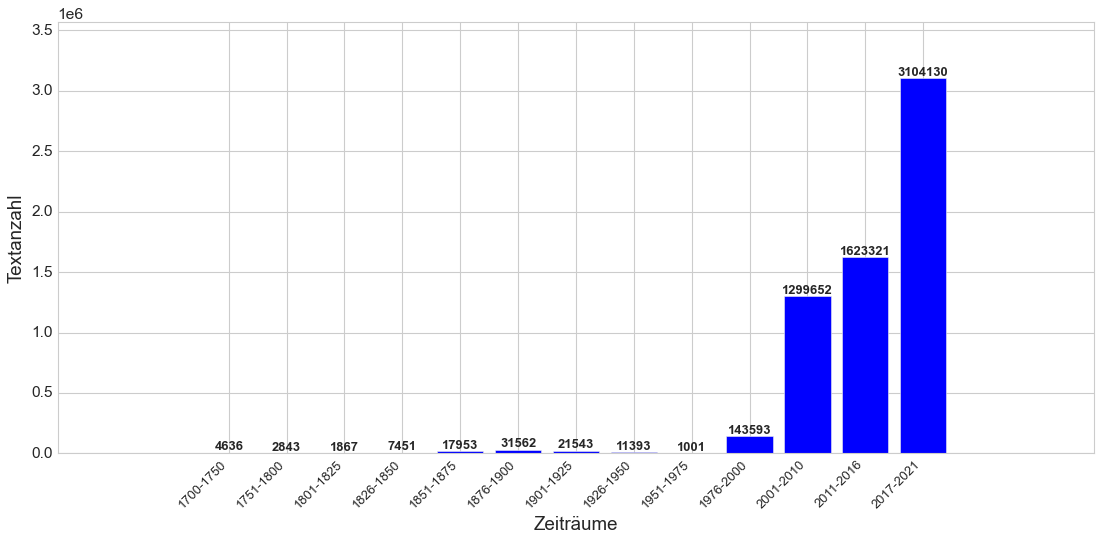

In [12]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, per_len.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusbig_textanzahl.png')
plt.show()

### Anzahl der Tokens pro Zeitraum

In [10]:
sum_words = {i: math.trunc(sum(df_bigger[df_bigger['period']==i].words)) for i in periods}
sum_words

{'1700-1750': 2086636,
 '1751-1800': 2603417,
 '1801-1825': 2120792,
 '1826-1850': 2842341,
 '1851-1875': 6508500,
 '1876-1900': 4418978,
 '1901-1925': 2932610,
 '1926-1950': 2333692,
 '1951-1975': 1746130,
 '1976-2000': 6305212,
 '2001-2010': 35966678,
 '2011-2016': 40738590,
 '2017-2021': 76032403}

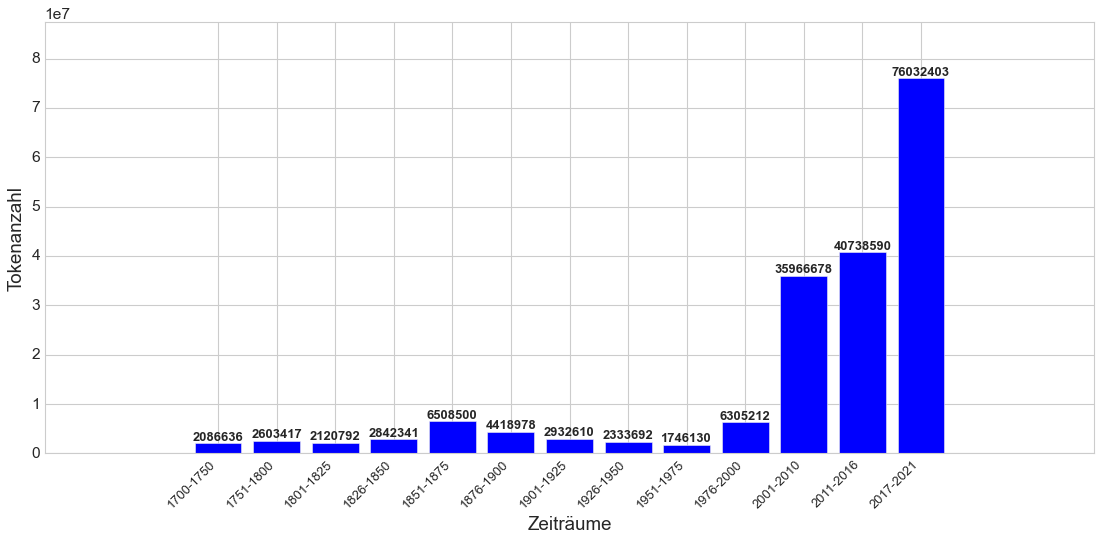

In [11]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words))
plt.bar(x_indexes, sum_words.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusbig_tokenanzahl.png')
plt.show()

### Durchschnittslänge der Texte pro Zeitraum

In [13]:
# gerundet auf 1 Nachkommastelle

mean_words = {i: round(df_bigger[df_bigger['period']==i].words.mean(), 1) for i in periods}
mean_words

{'1700-1750': 450.1,
 '1751-1800': 915.7,
 '1801-1825': 1135.9,
 '1826-1850': 381.5,
 '1851-1875': 362.5,
 '1876-1900': 140.0,
 '1901-1925': 136.1,
 '1926-1950': 204.8,
 '1951-1975': 1744.4,
 '1976-2000': 43.9,
 '2001-2010': 27.7,
 '2011-2016': 25.1,
 '2017-2021': 24.5}

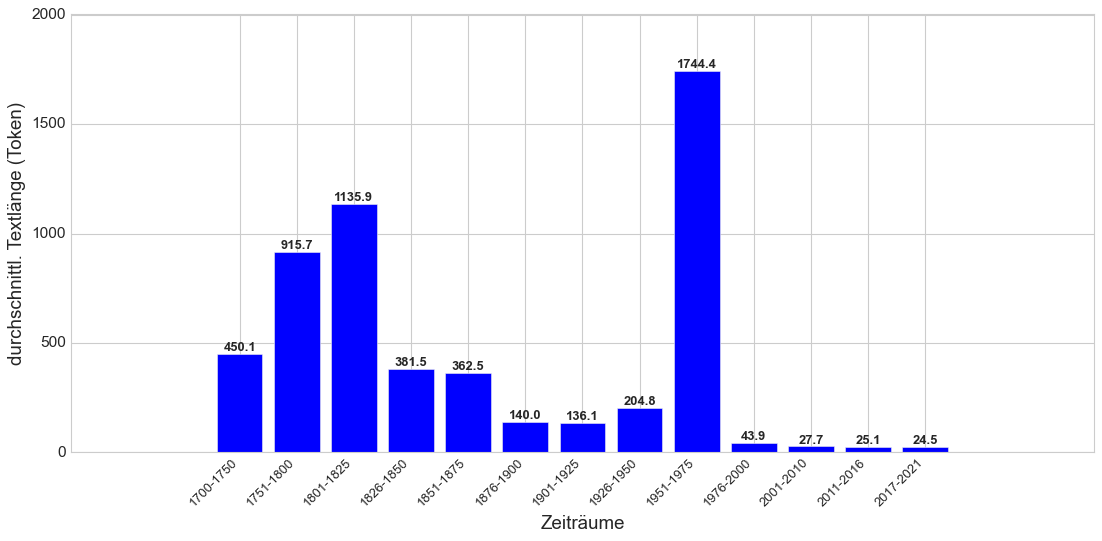

In [14]:
# Verteilung der durchschnittlichen Textlänge auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, mean_words.values(), label='Textlänge', width=0.8, color='b')
plt.xticks(ticks=x_indexes, labels=mean_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('durchschnittl. Textlänge (Token)')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, mean_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusbig_durchschn_tokenanzahl.png')
plt.show()

## Normalisierung

In [15]:
# zufälliges Ziehen ohne Zurücklegen von Samples (Texten) aus den letzten drei Zeiträumen 
# Samplegröße individuell festgegelegt durch Ausprobieren 
# --> ungefähre Anpassung an die Textanzahl des Zeitraums 1976-2000
# Ziel: ungefähres Übereinstimmen der Wortanzahl

norm1 = df_bigger[df_bigger['period']=='2001-2010'].sample(n=160000 , random_state=1)     # random_state für Reproduzierbarkeit
norm2 = df_bigger[df_bigger['period']=='2011-2016'].sample(n=175000 , random_state=1)
norm3 = df_bigger[df_bigger['period']=='2017-2021'].sample(n=180000 , random_state=1)

# Zeitraum 1976-2000 selbst noch etwas verkleinern 
# (durch Ausprobieren konnte festgestellt werden, dass sonst zu viele Wörter)
norm4 = df_bigger[df_bigger['period']=='1976-2000'].sample(n=100000 , random_state=1)

p1 = df_bigger[df_bigger['period']=='1700-1750']
p2 = df_bigger[df_bigger['period']=='1751-1800']
p3 = df_bigger[df_bigger['period']=='1801-1825']
p4 = df_bigger[df_bigger['period']=='1826-1850']
p5 = df_bigger[df_bigger['period']=='1851-1875']
p5 = df_bigger[df_bigger['period']=='1876-1900']
p6 = df_bigger[df_bigger['period']=='1901-1925']
p7 = df_bigger[df_bigger['period']=='1926-1950']
p8 = df_bigger[df_bigger['period']=='1951-1975']

# Zusammenfügen der Zeiträume und Samples zu einem neuen Dataframe
df_norm = pd.concat([p1, p2, p3, p4, p5, p6, p7, p8, norm4, norm1, norm2, norm3])

In [16]:
df_norm.head()

,doc,source,author,title,year,period,text type,text,words
0,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0
1,Poesia.IV.1.Testo.txt,MIDIA,Giuseppe Paolucci (Alessi Cillenio),Poesie,1700.0,1700-1750,poesia,IV. 1. Rime degli Arcadi: Alessi Cillenio (Giu...,10862.0
2,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0
3,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0
4,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0


In [17]:
df_norm.shape

(697296, 9)

### Anzahl der Texte pro Zeitraum

In [18]:
periods_norm = list(df_norm['period'].unique())
per_len_norm ={i: len(df_norm[df_norm['period']==i]) for i in periods_norm }
per_len_norm

{'1700-1750': 4636,
 '1751-1800': 2843,
 '1801-1825': 1867,
 '1826-1850': 7451,
 '1876-1900': 31562,
 '1901-1925': 21543,
 '1926-1950': 11393,
 '1951-1975': 1001,
 '1976-2000': 100000,
 '2001-2010': 160000,
 '2011-2016': 175000,
 '2017-2021': 180000}

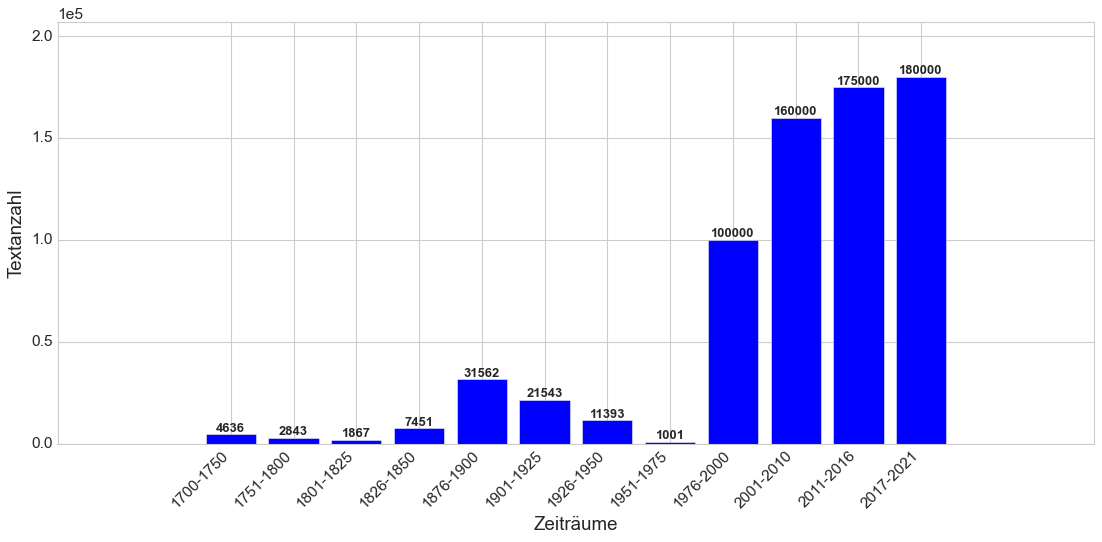

In [19]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods_norm))
plt.bar(x_indexes, per_len_norm.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len_norm.keys(), rotation=45, horizontalalignment='right')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusnorm_textanzahl.png')
plt.show()

### Anzahl der Tokens pro Zeitraum

In [20]:
sum_words_norm = {i: math.trunc(sum(df_norm[df_norm['period']==i].words)) for i in periods_norm}
sum_words_norm

{'1700-1750': 2086636,
 '1751-1800': 2603417,
 '1801-1825': 2120792,
 '1826-1850': 2842341,
 '1876-1900': 4418978,
 '1901-1925': 2932610,
 '1926-1950': 2333692,
 '1951-1975': 1746130,
 '1976-2000': 4402182,
 '2001-2010': 4460882,
 '2011-2016': 4390325,
 '2017-2021': 4397301}

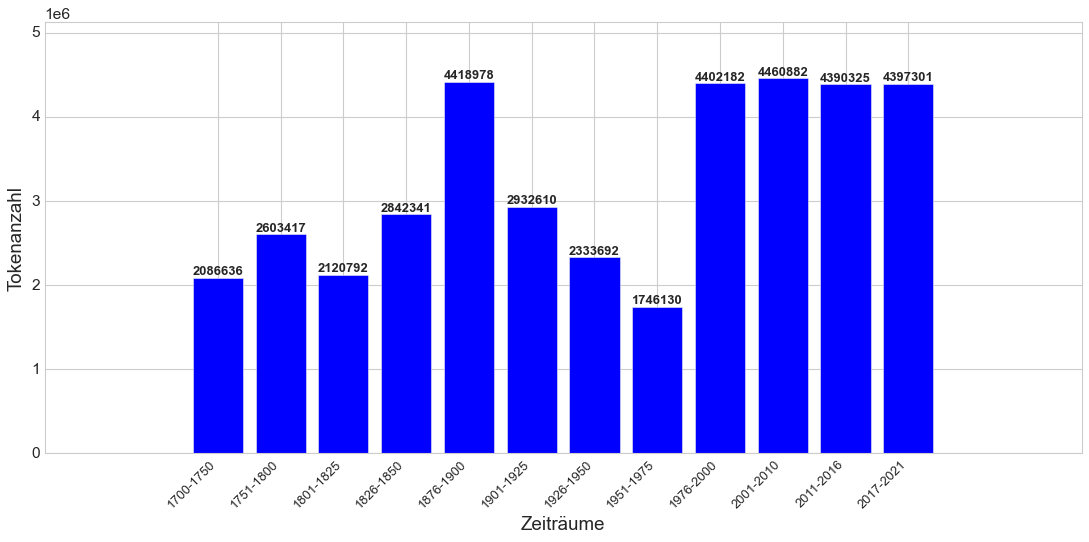

In [21]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words_norm))
plt.bar(x_indexes, sum_words_norm.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words_norm.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusnorm_tokenanzahl.png')
plt.show()

### Durchschnittslänge der Texte pro Zeitraum 

In [22]:
mean_words_norm = {i: round(df_norm[df_norm['period']==i].words.mean(), 2) for i in periods_norm}
mean_words_norm

{'1700-1750': 450.09,
 '1751-1800': 915.73,
 '1801-1825': 1135.94,
 '1826-1850': 381.47,
 '1876-1900': 140.01,
 '1901-1925': 136.13,
 '1926-1950': 204.84,
 '1951-1975': 1744.39,
 '1976-2000': 44.02,
 '2001-2010': 27.88,
 '2011-2016': 25.09,
 '2017-2021': 24.43}

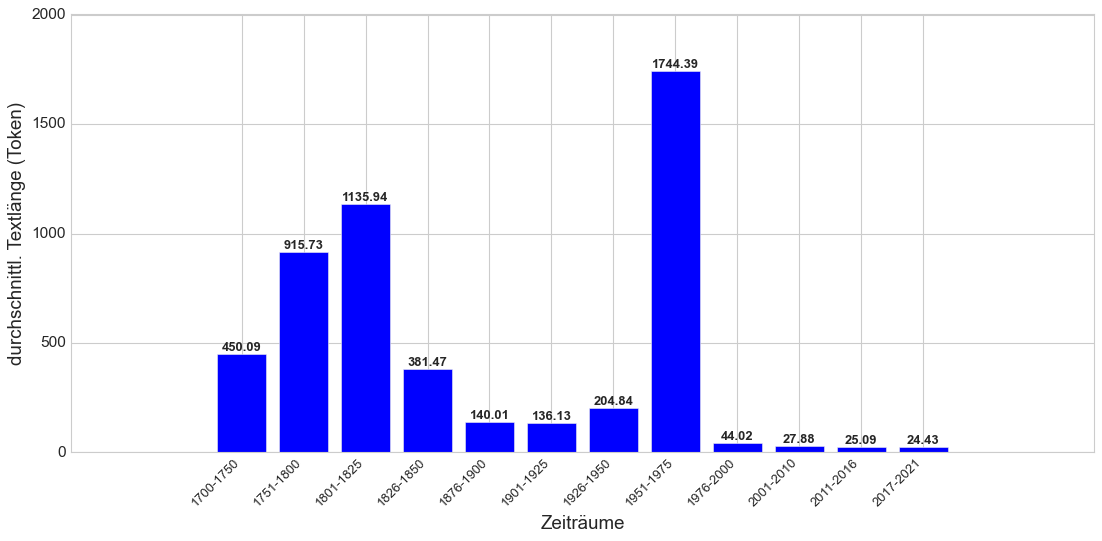

In [23]:
# Verteilung der durchschnittlichen Textlänge auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods_norm))
plt.bar(x_indexes, mean_words_norm.values(), label='Textlänge', width=0.8, color='b')
plt.xticks(ticks=x_indexes, labels=mean_words_norm.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('durchschnittl. Textlänge (Token)')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, mean_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusnorm_durchschn_tokenanzahl.png')
plt.show()

### Verteilung der Texttypen auf die Zeiträume

In [24]:
period_frames = []

In [25]:
# Teilframes pro Zeitraum erstellen

df_periods = dict(tuple(df_norm.groupby(by='period')))

for df, period in zip(df_periods, periods_norm):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [26]:
periods_texttypes = {}

In [27]:
# Anzahl der Texte pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    texttypes = df.groupby(by='text type')
    types = texttypes.groups
    
    periods_texttypes[period] = {key : len(value) for key, value in types.items()}

In [28]:
periods_texttypes

{'1700-1750': {'espositivo': 15,
  'personale': 19,
  'poesia': 13,
  'prosa letteraria': 4564,
  'teatro': 25},
 '1751-1800': {'espositivo': 33,
  'personale': 16,
  'poesia': 21,
  'prosa letteraria': 2727,
  'teatro': 46},
 '1801-1825': {'espositivo': 57,
  'personale': 25,
  'poesia': 31,
  'prosa letteraria': 1746,
  'teatro': 8},
 '1826-1850': {'espositivo': 34,
  'personale': 12,
  'poesia': 11,
  'prosa letteraria': 7388,
  'teatro': 6},
 '1876-1900': {'espositivo': 18,
  'personale': 5,
  'poesia': 14,
  'prosa letteraria': 31505,
  'stampa': 10,
  'teatro': 10},
 '1901-1925': {'espositivo': 26,
  'personale': 6,
  'poesia': 13,
  'prosa letteraria': 21479,
  'stampa': 11,
  'teatro': 8},
 '1926-1950': {'espositivo': 30,
  'personale': 6,
  'poesia': 3,
  'prosa letteraria': 11307,
  'stampa': 41,
  'teatro': 6},
 '1951-1975': {'dialogo': 4,
  'espositivo': 12,
  'prosa letteraria': 396,
  'stampa': 589},
 '1976-2000': {'espositivo': 5, 'prosa letteraria': 5, 'stampa': 99990},

In [29]:
periods_texttypes_token = {}

In [30]:
# Anzahl der Tokens pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    words = {i: math.trunc(sum(df[df['text type']==i].words)) for i in list(df['text type'].unique())}
    periods_texttypes_token[period] = words

In [45]:
periods_texttypes_token

{'1700-1750': {'espositivo': 877862,
  'poesia': 512572,
  'personale': 236165,
  'prosa letteraria': 208660,
  'teatro': 251377},
 '1751-1800': {'espositivo': 1347425,
  'personale': 392092,
  'teatro': 474435,
  'poesia': 198675,
  'prosa letteraria': 190790},
 '1801-1825': {'poesia': 169653,
  'personale': 964186,
  'espositivo': 666818,
  'teatro': 84209,
  'prosa letteraria': 235926},
 '1826-1850': {'poesia': 256355,
  'personale': 266103,
  'teatro': 39936,
  'prosa letteraria': 872137,
  'espositivo': 1407810},
 '1876-1900': {'prosa letteraria': 3574012,
  'poesia': 119215,
  'espositivo': 598479,
  'personale': 38992,
  'stampa': 4348,
  'teatro': 83932},
 '1901-1925': {'prosa letteraria': 2193853,
  'espositivo': 417891,
  'poesia': 137089,
  'teatro': 68063,
  'personale': 114027,
  'stampa': 1687},
 '1926-1950': {'stampa': 25916,
  'prosa letteraria': 1372102,
  'espositivo': 673990,
  'personale': 210866,
  'teatro': 38471,
  'poesia': 12347},
 '1951-1975': {'stampa': 78943

In [65]:
espositivo = []
dialogo = []
poesia = []
personale = []
prosa_lett = []
stampa = []
teatro = []
web = []

In [66]:
# Werte des Texttyps rausziehen und in Liste speichern 

for i in periods_texttypes_token:
    
    esp = periods_texttypes_token.get(i, {}).get('espositivo')
    espositivo.append(esp)
    
    di = periods_texttypes_token.get(i, {}).get('dialogo')
    dialogo.append(di)
    
    po = periods_texttypes_token.get(i, {}).get('poesia')
    poesia.append(po)
    
    per = periods_texttypes_token.get(i, {}).get('personale')
    personale.append(per)
    
    prolet = periods_texttypes_token.get(i, {}).get('prosa letteraria')
    prosa_lett.append(prolet)
    
    st = periods_texttypes_token.get(i, {}).get('stampa')
    stampa.append(st)
    
    tea = periods_texttypes_token.get(i, {}).get('teatro')
    teatro.append(tea)
    
    w = periods_texttypes_token.get(i, {}).get('web')
    web.append(w)

In [67]:
# None mit 0 ersetzen

espositivo = [0 if v is None else v for v in espositivo]
dialogo = [0 if v is None else v for v in dialogo]
poesia = [0 if v is None else v for v in poesia]
personale = [0 if v is None else v for v in personale]
prosa_lett = [0 if v is None else v for v in prosa_lett]
stampa = [0 if v is None else v for v in stampa]
teatro = [0 if v is None else v for v in teatro]
web = [0 if v is None else v for v in web]

In [82]:
print(espositivo)
print(dialogo)
print(personale)
print(poesia)
print(prosa_lett)
print(stampa)
print(teatro)
print(web)

[877862, 1347425, 666818, 1407810, 598479, 417891, 673990, 84158, 1077, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 14983, 0, 0, 0, 0]
[236165, 392092, 964186, 266103, 38992, 114027, 210866, 0, 0, 0, 0, 0]
[512572, 198675, 169653, 256355, 119215, 137089, 12347, 0, 0, 0, 0, 0]
[208660, 190790, 235926, 872137, 3574012, 2193853, 1372102, 857556, 95001, 47591, 0, 0]
[0, 0, 0, 0, 4348, 1687, 25916, 789433, 4306104, 2286261, 2905773, 2805488]
[251377, 474435, 84209, 39936, 83932, 68063, 38471, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2127030, 1484552, 1591813]


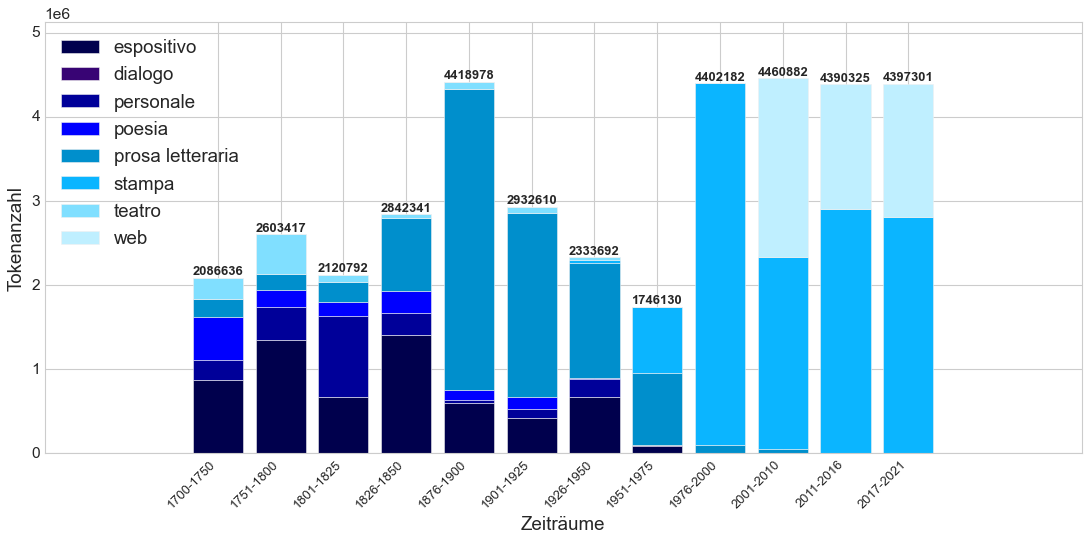

In [113]:
# Verteilung der Texttypen auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

data = np.array([espositivo, dialogo, personale, poesia, prosa_lett, stampa, teatro, web])
labels = ['espositivo', 'dialogo', 'personale', 'poesia', 'prosa letteraria', 'stampa', 'teatro', 'web']
colors = ['#00004d','#380474', '#000099', '#0000FF', '#008fcc', '#0BB5FF', '#80dfff', '#BFEFFF']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    plt.bar(X, data[i],bottom = np.sum(data[:i], axis=0),label=labels[i % len(labels)], color=colors[i % len(colors)])

x_indexes = np.arange(len(periods_norm))
plt.xticks(ticks=x_indexes, labels=periods_norm, rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='upper left')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusnorm_tokenanzahl_texttypes.png')
plt.show()

In [114]:
# normalisiertes Korpus speichern

df_norm.to_csv('Korpus/corpus_norm.csv', encoding='utf-8', index=False)

### Kandidaten im normalisierten Korpus

In [2]:
# wieder einlesen 

df = pd.read_csv('Korpus/corpus_norm.csv', sep=',', encoding='utf-8')

In [4]:
df.head()

,doc,source,author,title,year,period,text type,text,words
0,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0
1,Poesia.IV.1.Testo.txt,MIDIA,Giuseppe Paolucci (Alessi Cillenio),Poesie,1700.0,1700-1750,poesia,IV. 1. Rime degli Arcadi: Alessi Cillenio (Giu...,10862.0
2,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0
3,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0
4,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0


In [5]:
df.shape

(697296, 9)

In [11]:
df.text = df.text.fillna('')

In [13]:
# Teilframes pro Zeitraum erstellen

period_frames = []
periods = list(df['period'].unique())
df_periods = dict(tuple(df.groupby(by='period')))

for df, period in zip(df_periods, periods):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [15]:
# Funktion, die bestimmte Wörter zählt

def count_keywords(df, keywords):
    keyword_dict = {w:w.replace(' ', '_') for w in keywords}

    corpus = ' '.join(df.text).lower()
    for w,w2 in keyword_dict.items():
        corpus = corpus.replace(w,w2)

    all_counts = Counter(corpus.split())
    final_counts = {w:all_counts[w2] for w,w2 in keyword_dict.items()}
    return final_counts

In [29]:
# mögliche Kandidaten
# Achtung: da das Korpus noch nicht lemmatisiert ist, stimmen die Frequenzen noch nicht ganz (v.a. bei Verben)!
# erstmal nur zur Orientierung --> nach Lemmatisierung erneut durchführen

keywords = ['atrocemente', 'formidabilmente', 'mostruosamente', 'orrendamente', 
            'orribilmente', 'spaventosamente', 'terribilmente', 'tremendamente', 
            'molto', 'angoscia', 'angosciare', 'ansia', 'atterrire', 'panico', 
            'paura', 'raccapricciare', 'raccapriccio', 'schifo', 'sgomentare', 
            'sgomento', 'spaventare', 'spavento', 'terrore', 'domani', 'finora', 
            'ieri', 'oggi', 'presto', 'raramente', 'sempre', 'spesso']

In [31]:
candidates = {}

for df, period in zip(period_frames, periods):
    res = count_keywords(df, keywords)
    candidates[period] = res

In [32]:
candidates

{'1700-1750': {'atrocemente': 2,
  'formidabilmente': 0,
  'mostruosamente': 2,
  'orrendamente': 1,
  'orribilmente': 19,
  'spaventosamente': 9,
  'terribilmente': 13,
  'tremendamente': 0,
  'molto': 1658,
  'angoscia': 7,
  'angosciare': 0,
  'ansia': 0,
  'atterrire': 31,
  'panico': 22,
  'paura': 511,
  'raccapricciare': 0,
  'raccapriccio': 1,
  'schifo': 7,
  'sgomentare': 0,
  'sgomento': 4,
  'spaventare': 6,
  'spavento': 308,
  'terrore': 554,
  'domani': 48,
  'finora': 432,
  'ieri': 13,
  'oggi': 787,
  'presto': 422,
  'raramente': 8,
  'sempre': 2153,
  'spesso': 637},
 '1751-1800': {'atrocemente': 3,
  'formidabilmente': 0,
  'mostruosamente': 0,
  'orrendamente': 1,
  'orribilmente': 18,
  'spaventosamente': 0,
  'terribilmente': 12,
  'tremendamente': 0,
  'molto': 1848,
  'angoscia': 40,
  'angosciare': 0,
  'ansia': 0,
  'atterrire': 9,
  'panico': 14,
  'paura': 163,
  'raccapricciare': 0,
  'raccapriccio': 7,
  'schifo': 26,
  'sgomentare': 1,
  'sgomento': 4,


In [34]:
table = pd.DataFrame.from_dict(candidates, orient='index')
table

,atrocemente,formidabilmente,mostruosamente,orrendamente,orribilmente,spaventosamente,terribilmente,tremendamente,molto,angoscia,...,spavento,terrore,domani,finora,ieri,oggi,presto,raramente,sempre,spesso
1700-1750,2,0,2,1,19,9,13,0,1658,7,...,308,554,48,432,13,787,422,8,2153,637
1751-1800,3,0,0,1,18,0,12,0,1848,40,...,182,427,134,214,74,552,788,79,3020,1103
1801-1825,2,0,2,9,25,2,13,2,1348,37,...,163,259,285,96,353,1091,494,22,2928,660
1826-1850,24,2,3,8,61,3,31,6,1896,156,...,558,1228,174,319,133,857,755,46,3194,1254
1876-1900,115,15,36,45,208,79,202,64,3701,727,...,1052,1483,4314,852,2494,4364,3515,297,8530,3043
1901-1925,55,13,21,33,179,101,159,19,2728,774,...,556,1114,3430,563,1586,3057,2381,325,5657,2589
1926-1950,37,9,14,25,82,67,170,22,1840,662,...,362,965,1875,259,1026,2337,959,99,3481,1008
1951-1975,16,0,6,6,21,26,13,3,1108,76,...,28,111,190,83,280,1094,297,41,2340,729
1976-2000,97,5,78,171,156,140,1045,348,9548,4912,...,858,6851,8099,7345,11037,12068,7635,3039,13309,8415
2001-2010,144,35,214,215,336,395,1928,1067,6650,2493,...,1649,2711,3348,2761,4074,5995,3061,2580,7898,3850


In [35]:
table.to_csv('Korpus/candidates_before_lemmatization.csv')

In [44]:
test = pd.read_csv('Korpus/candidates_before_lemmatization.csv', sep=',')

In [46]:
test.head()

,Unnamed: 0,atrocemente,formidabilmente,mostruosamente,orrendamente,orribilmente,spaventosamente,terribilmente,tremendamente,molto,...,spavento,terrore,domani,finora,ieri,oggi,presto,raramente,sempre,spesso
0,1700-1750,2,0,2,1,19,9,13,0,1658,...,308,554,48,432,13,787,422,8,2153,637
1,1751-1800,3,0,0,1,18,0,12,0,1848,...,182,427,134,214,74,552,788,79,3020,1103
2,1801-1825,2,0,2,9,25,2,13,2,1348,...,163,259,285,96,353,1091,494,22,2928,660
3,1826-1850,24,2,3,8,61,3,31,6,1896,...,558,1228,174,319,133,857,755,46,3194,1254
4,1876-1900,115,15,36,45,208,79,202,64,3701,...,1052,1483,4314,852,2494,4364,3515,297,8530,3043
